## jupyter notebook

seaborn: statistical data visualization

http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/

dataset: Seaborn - flights  https://github.com/mwaskom/seaborn-data/blob/master/flights.csv

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"

In [2]:
df = pd.pivot_table(data=sns.load_dataset("flights"),
                    index='month',
                    values='passengers',
                    columns='year')
df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


## Default plot

<AxesSubplot:xlabel='year', ylabel='month'>

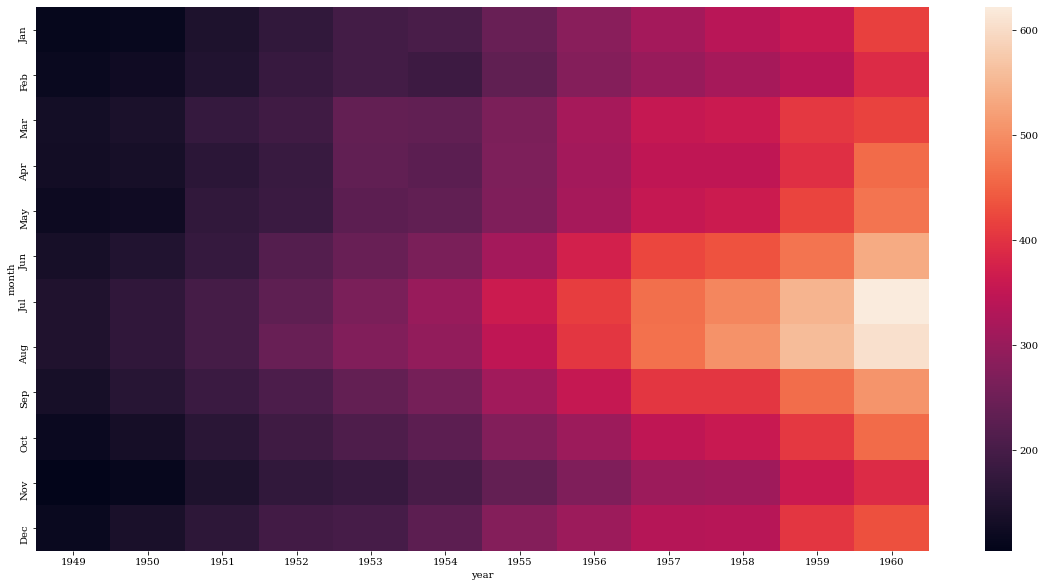

In [3]:
sns.heatmap(df)

### `cmap` adjusts the colormap used. I like diverging colormaps for heatmaps because they provide good contrast.

<AxesSubplot:xlabel='year', ylabel='month'>

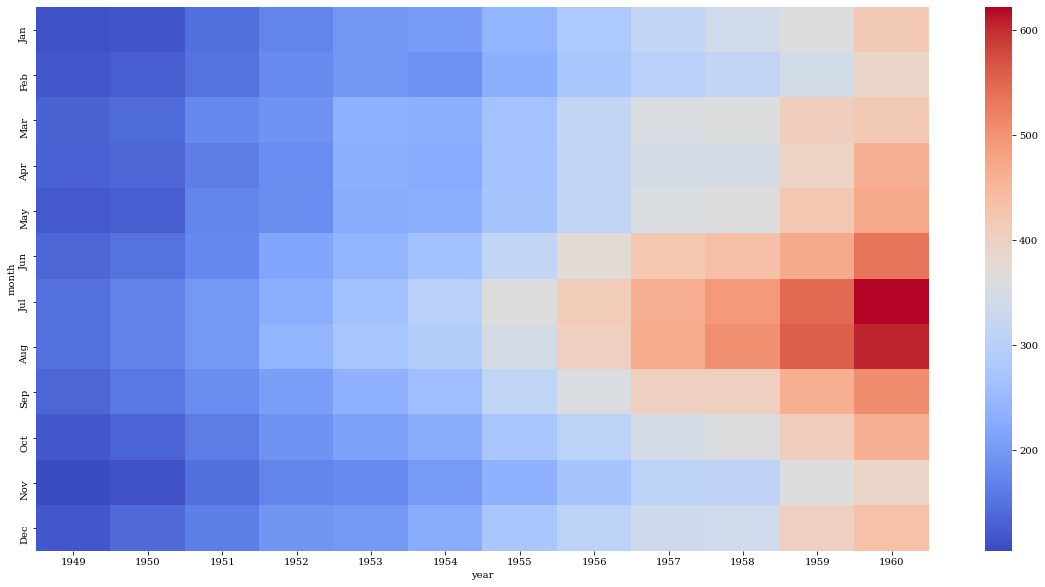

In [4]:
sns.heatmap(df, cmap='coolwarm')

`center` can be used to indicate at which numeric value to use the center of the colormap. Above we see most of the map using blues, so by setting the value of center equal to the midpoint of the data then we can create a map where there are more equal amounts of red and blue shades.

<AxesSubplot:xlabel='year', ylabel='month'>

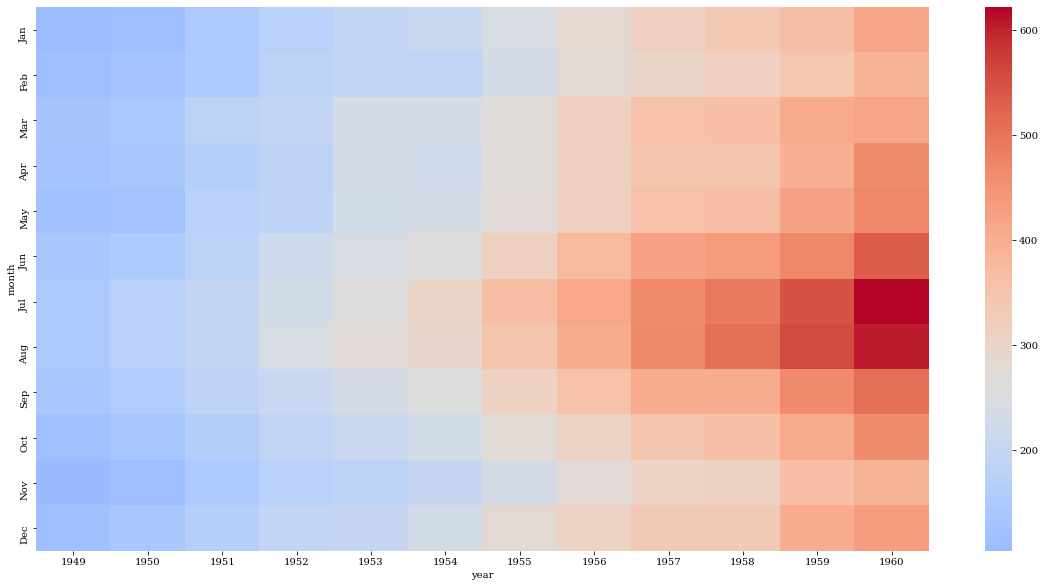

In [5]:
midpoint = (df.values.max() - df.values.min()) / 2
sns.heatmap(df, cmap='coolwarm', center=midpoint)

Adjust the lower and upper contrast bounds with vmin and vmax. Everything below vmin will be the same color. Likewise for above vmax.

<AxesSubplot:xlabel='year', ylabel='month'>

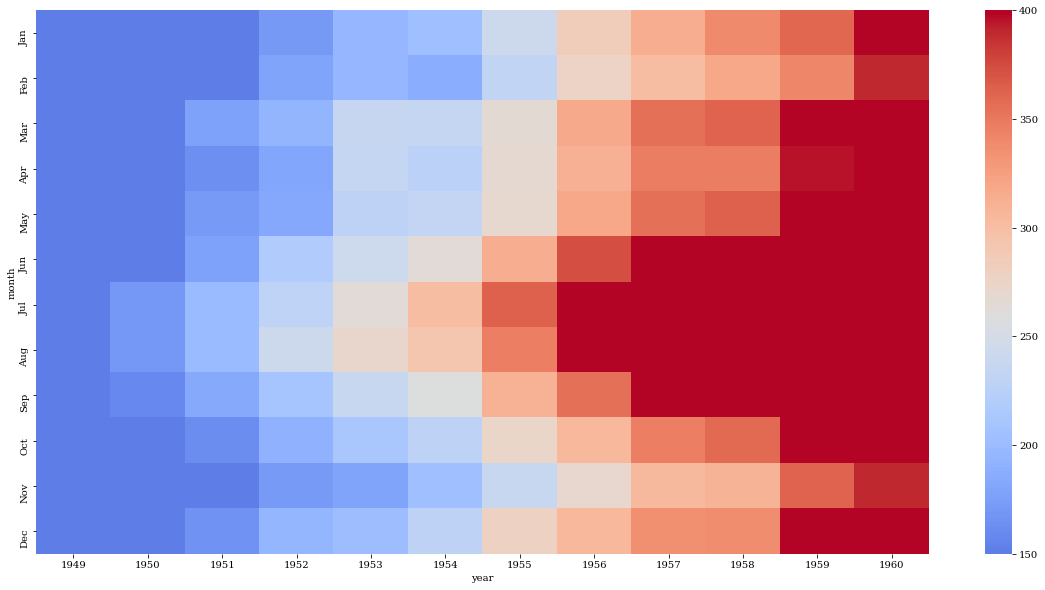

In [6]:
midpoint = (df.values.max() - df.values.min()) / 2
sns.heatmap(df, cmap='coolwarm', center=midpoint, vmin=150, vmax=400)

Alternatively, you can set vmin and vmax to lie outside of the range of the data for a more muted, washed-out look

<AxesSubplot:xlabel='year', ylabel='month'>

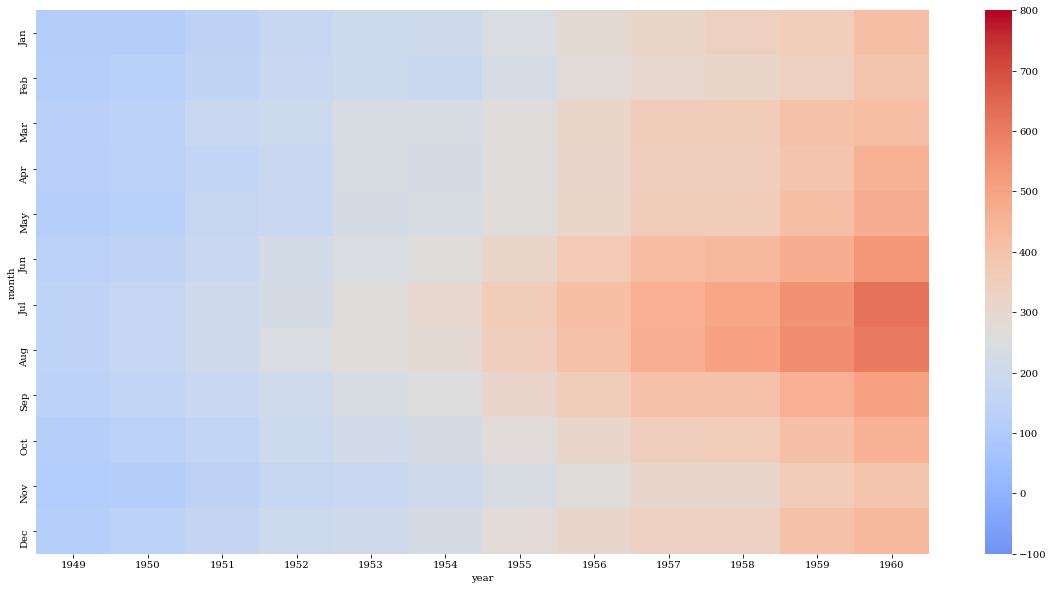

In [7]:
midpoint = (df.values.max() - df.values.min()) / 2
sns.heatmap(df, cmap='coolwarm', center=midpoint, vmin=-100, vmax=800)

`robust` sets contrast levels based on **quantiles** and works like an "auto-contrast" for choosing good values

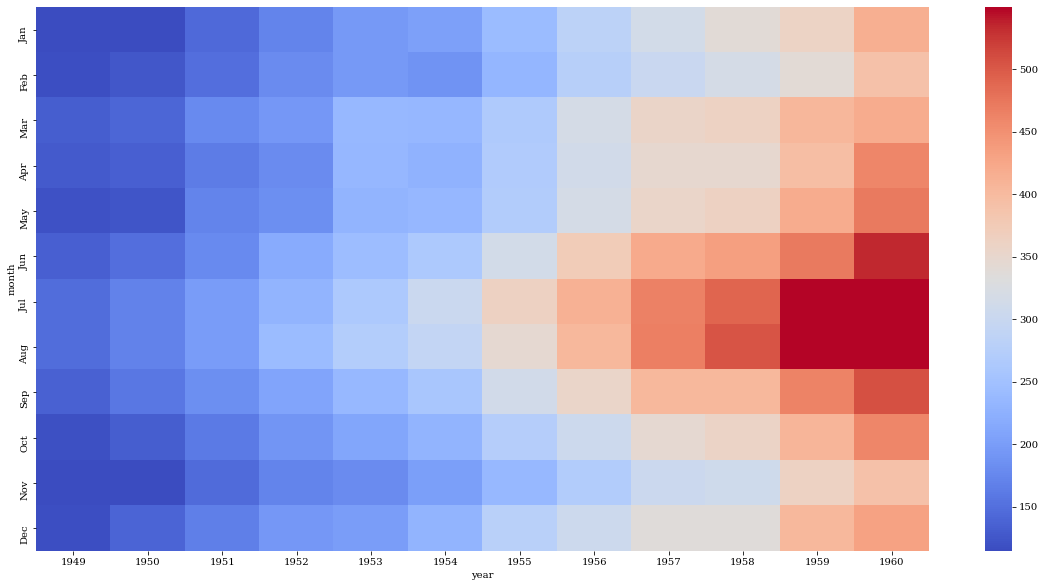

In [8]:
p = sns.heatmap(df, cmap='coolwarm', robust=True)

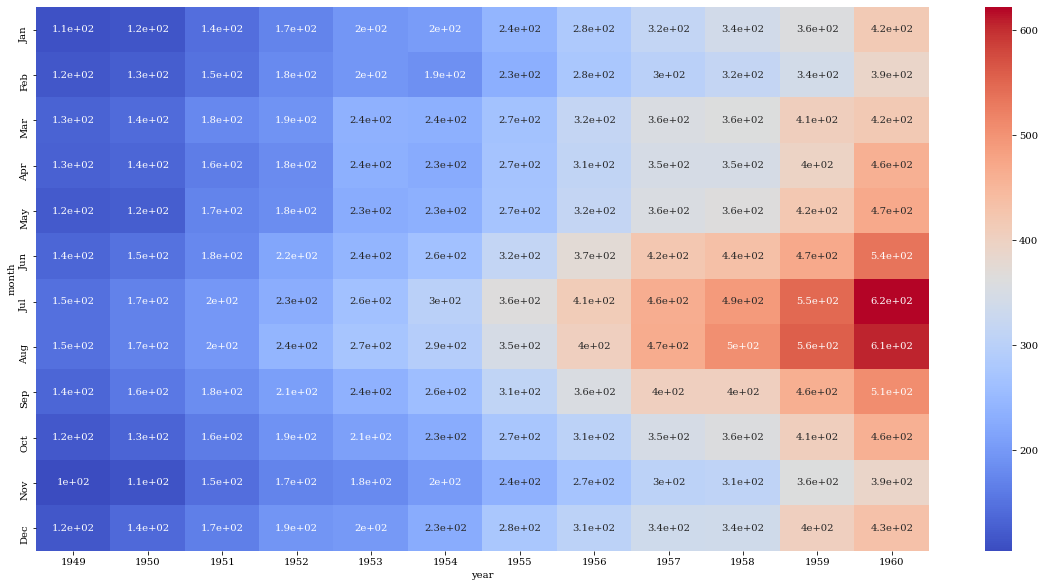

In [9]:
# Label the rectangles with annot=True, which also chooses a suitable text color
p = sns.heatmap(df, cmap='coolwarm', annot=True)

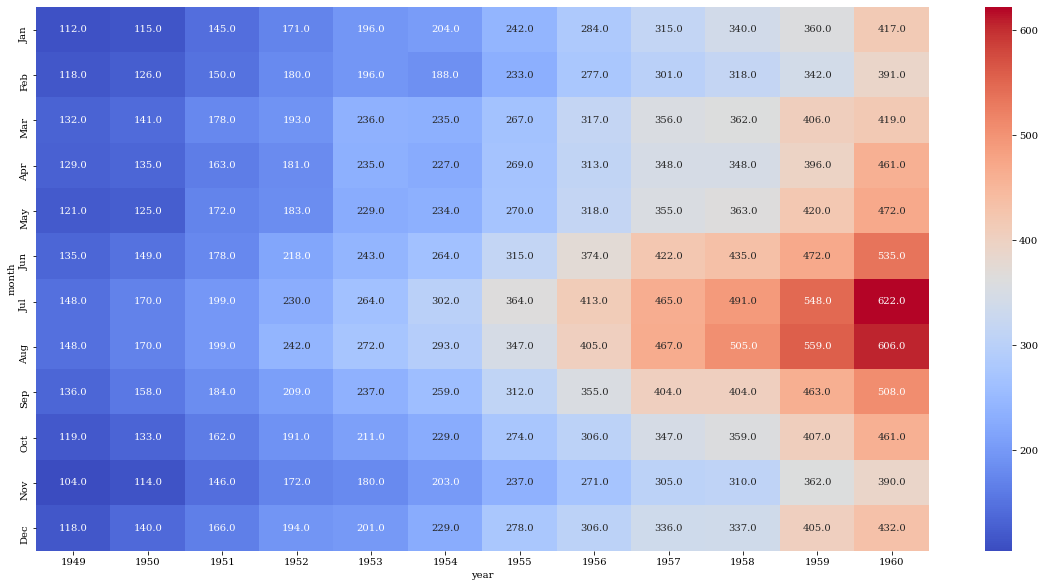

In [10]:
# The format of the annotation can be changed with fmt - here I'll change from the default scientific notation to one decimal precision
p = sns.heatmap(df, cmap='coolwarm', annot=True, fmt=".1f")

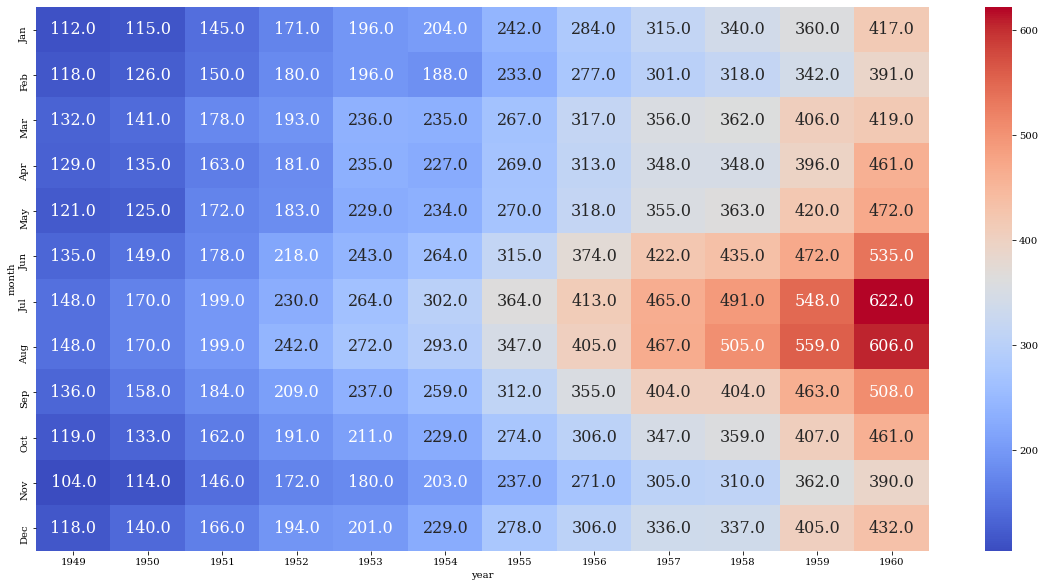

In [12]:
# Any other parameters for the text, such as the font size, can be passed with `annot_kws`.
p = sns.heatmap(df, cmap='coolwarm', annot=True, fmt=".1f", annot_kws={'size':16})

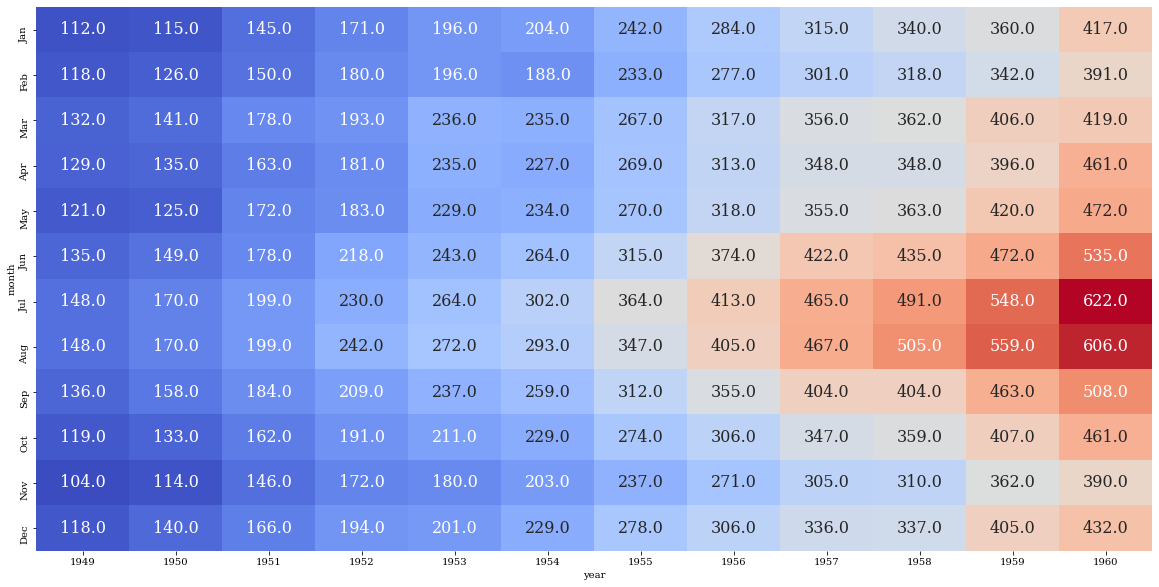

In [13]:
# cbar can be used to turn off the colorbar
p = sns.heatmap(df,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':16},
                cbar=False)

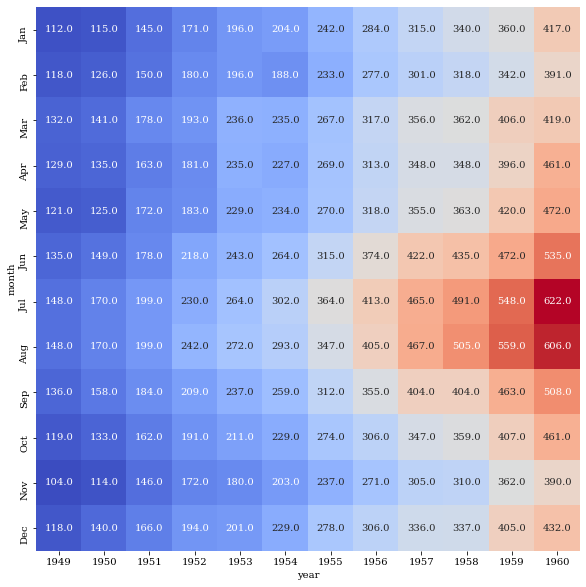

In [14]:
# square forces the aspect ratio of the blocks to be equal
p = sns.heatmap(df,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':10},
                cbar=False,
                square=True)

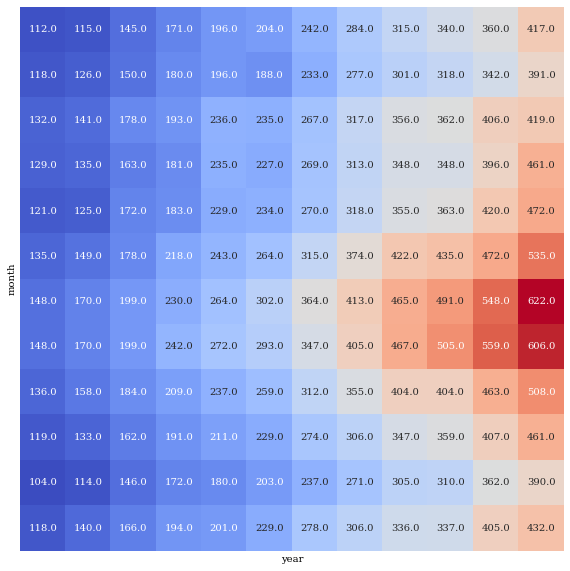

In [15]:
# xticklabels and yticklabels are booleans to turn off the axis labels
p = sns.heatmap(df,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':10},
                cbar=False,
                square=True,
                xticklabels=False,
                yticklabels=False)

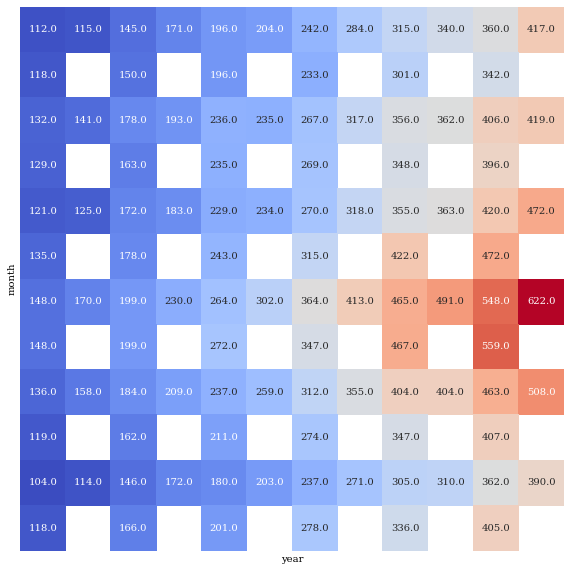

In [16]:
# If you would like to hide certain values, pass in a binary mask
mask = np.zeros(df.shape)
mask[1::2,1::2] = 1
p = sns.heatmap(df,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':10},
                cbar=False,
                square=True,
                xticklabels=False,
                yticklabels=False,
                mask=mask)

Text(5, 12.3, 'Heat Map')

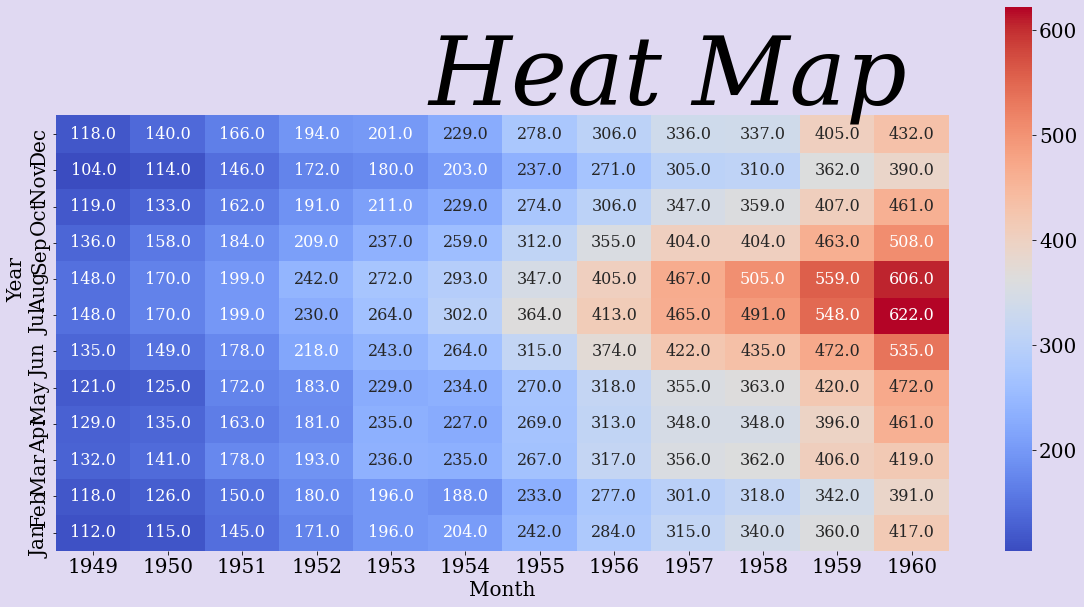

In [17]:
# Finalize
plt.rcParams['font.size'] = 20
bg_color = (0.88,0.85,0.95)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color
fig, ax = plt.subplots(1)
p = sns.heatmap(df,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':16},
                ax=ax)
plt.xlabel('Month')
plt.ylabel('Year')
ax.set_ylim((0,15))
plt.text(5,12.3, "Heat Map", fontsize = 95, color='Black', fontstyle='italic')

In [18]:
p.get_figure().savefig('./figures/heatmap.png')